In [1]:
import numpy as np
from scipy.stats import beta, t, norm
from scipy.special import btdtri
import matplotlib.pyplot as plt

In [2]:
p = 0.5
n = 10

success = np.random.binomial(p=p, n=n)
failure = n - success
print("success = %i, failure = %i"%(success, failure))

success = 5, failure = 5


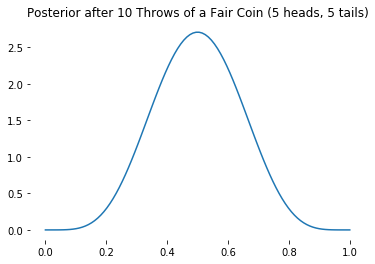

In [3]:
prior_a = 1
prior_b = 1

a = prior_a + success
b = prior_b + failure
rv = beta(a, b)

for spine in plt.gca().spines.values():
    spine.set_visible(False)

x = np.linspace(0, 1, 100)
plt.plot(x, rv.pdf(x))
plt.title("Posterior after 10 Throws of a Fair Coin (%i heads, %i tails)"%(success, failure))
plt.savefig("outputs/credible_10_throws.png")

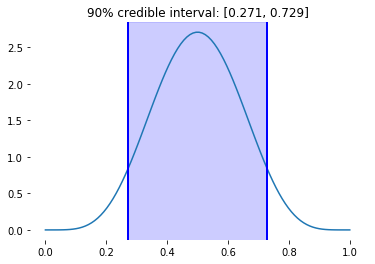

In [4]:
b_up = btdtri(a, b, 0.95)
b_lo = btdtri(a, b, 0.05)

plt.plot(x, rv.pdf(x))

right_line = plt.axvline(b_up, lw=2, color='blue')
left_line = plt.axvline(b_lo, lw=2, color='blue')
fill = plt.axvspan(b_lo, b_up, alpha=0.2, color='blue')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.title("90%% credible interval: [%.3f, %.3f]"%(b_lo, b_up))
plt.savefig("outputs/credible_middle.png")

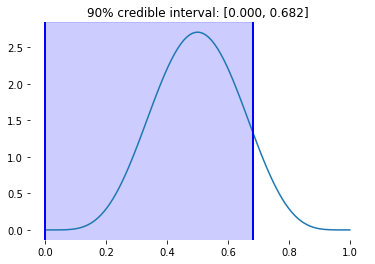

In [5]:
b_up = btdtri(a, b, 0.9)
b_lo = btdtri(a, b, 0.)

plt.plot(x, rv.pdf(x))

right_line = plt.axvline(b_up, lw=2, color='blue')
left_line = plt.axvline(b_lo, lw=2, color='blue')
fill = plt.axvspan(b_lo, b_up, alpha=0.2, color='blue')

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.title("90%% credible interval: [%.3f, %.3f]"%(b_lo, b_up))
plt.savefig("outputs/credible_left.png")

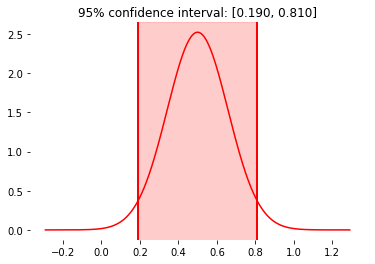

In [6]:
p_hat = success / n
se = np.sqrt(p_hat * (1 - p_hat) / n)

f_up = p_hat + 1.96 * se
f_lo = p_hat - 1.96 * se

x = np.linspace(p_hat - 5 * se, p_hat + 5 * se, 1000)
plt.plot(x, norm.pdf(x, loc=p_hat, scale=se), color='r')

right_line = plt.axvline(f_up, lw=2, color='red')
left_line = plt.axvline(f_lo, lw=2, color='red')
fill = plt.axvspan(f_lo, f_up, alpha=0.2, color='red')

for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title("95%% confidence interval: [%.3f, %.3f]"%(f_lo, f_up))
plt.savefig("outputs/credible_compare_confidence.png")

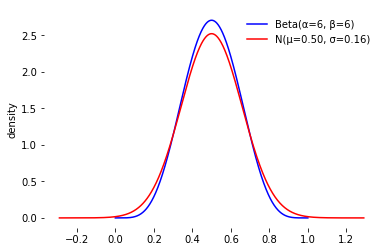

In [7]:
fig, ax = plt.subplots()

x = np.linspace(0, 1, 1000)
ax.plot(x, rv.pdf(x), color='blue')

x = np.linspace(p_hat - 5 * se, p_hat + 5 * se, 1000)
ax.plot(x, norm.pdf(x, loc=p_hat, scale=se), color='r')

ax.legend(["Beta(\u03B1=%i, \u03B2=%i)"%(a, b), "N(\u03BC=%.2f, \u03C3=%.2f)"%(p_hat, se)], frameon=False)
ax.set_ylabel("density")

# title = "success %i, failure %i"%(success, failure)
# ax.set_xlabel(title)

# minimalism style
# ax.tick_params(top=False, bottom=False, left=False, right=False, labelleft=False, labelbottom=True)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.savefig("outputs/ci_compare_2.png")

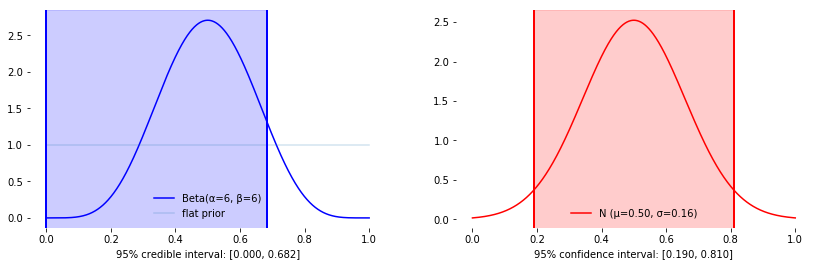

In [8]:
fig = plt.figure(figsize=(14, 4))
grid = plt.GridSpec(1, 2, hspace=0.2, wspace=0.2)

ax1 = fig.add_subplot(grid[:, :1])
ax2 = fig.add_subplot(grid[:, 1:])

# bayesian credible interval
x = np.linspace(0, 1, 1000)
ax1.plot(x, rv.pdf(x), color='blue')

# plot prior if necessary
rv_prior = beta(prior_a, prior_b)
ax1.plot(x, rv_prior.pdf(x), alpha=0.2)

# bayesian credible interval
right_line = ax1.axvline(b_up, lw=2, color='blue')
left_line = ax1.axvline(b_lo, lw=2, color='blue')
fill = ax1.axvspan(b_lo, b_up, alpha=0.2, color='blue')

ax1.set_xlabel("95%% credible interval: [%.3f, %.3f]"%(b_lo, b_up))
ax1.legend(["Beta(\u03B1=%i, \u03B2=%i)"%(a, b), "flat prior"], frameon=False)

ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)
ax1.spines["left"].set_visible(False)
ax1.spines["bottom"].set_visible(False)
    
# frequentist confidence interval
ax2.plot(x, norm.pdf(x, loc=p_hat, scale=se), color='r')
right_line = ax2.axvline(f_up, lw=2, color='r')
left_line = ax2.axvline(f_lo, lw=2, color='r')
fill = ax2.axvspan(f_lo, f_up, alpha=0.2, color='r')

ax2.set_xlabel("95%% confidence interval: [%.3f, %.3f]"%(f_lo, f_up))
ax2.legend(["N (\u03BC=%.2f, \u03C3=%.2f)"%(p_hat, se)], frameon=False)

ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)
ax2.spines["left"].set_visible(False)
ax2.spines["bottom"].set_visible(False)

plt.savefig("outputs/ci_compare_trans.png", transparent=True)